# Exercise 2: Neural Networks

In the previous exercise you implemented a binary classifier with one linear layer on a small portion of CIFAR-10. In this exercise, you will first implement a multi-class logistic regression model followed by a three layer neural network.

## Submission guidelines:

**Zip** all the files in the exercise directory excluding the data. Name the file `ex2_ID.zip`.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. 
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Do not change the functions we provided you. 
4. Write your functions in the instructed python modules only. All the logic you write is imported and used using this jupyter notebook. You are allowed to add functions as long as they are located in the python modules and are imported properly.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden.
6. Your code must run without errors. Use `python 3` and `numpy 1.15.4`.
7. **Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works. Code that cannot run will not be tested.**
8. Write your own code. Cheating will not be tolerated. 
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support).

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.7.1
Numpy version:  1.15.4


# Logistic Regression

During this exercise, you are allowed (and encouraged) to use your code from HW1.

## Load Data - CIFAR-10

The next few cells will download and extract CIFAR-10 into `datasets/cifar10/` - notice you can copy and paste this dataset from the previous exercise or just download it again. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The dataset is divided into five training batches and one test batch, each with 10,000 images. The test batch contains exactly 1,000 randomly-selected images from each class.


In [5]:
from datasets import load_cifar10
URL = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
PATH = 'datasets/cifar10/' # the script will create required directories
load_cifar10.maybe_download_and_extract(URL, PATH) 

Data has apparently already been downloaded and unpacked.


In [6]:
CIFAR10_PATH = os.path.join(PATH, 'cifar-10-batches-py')
X_train, y_train, X_test, y_test = load_cifar10.load(CIFAR10_PATH) # load the entire data

# define a splitting for the data
num_training = 49000
num_validation = 1000
num_testing = 1000

# add a validation dataset for hyperparameter optimization
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = range(num_validation)
X_val = X_test[mask]
y_val = y_test[mask]
mask = range(num_validation, num_validation+num_testing)
X_test = X_test[mask]
y_test = y_test[mask]

# float64
X_train = X_train.astype(np.float64)
X_val = X_val.astype(np.float64)
X_test = X_test.astype(np.float64)

# subtract the mean from all the images in the batch
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# flatten all the images in the batch (make sure you understand why this is needed)
X_train = np.reshape(X_train, newshape=(X_train.shape[0], -1))
X_val = np.reshape(X_val, newshape=(X_val.shape[0], -1)) 
X_test = np.reshape(X_test, newshape=(X_test.shape[0], -1)) 

# add a bias term to all images in the batch
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) 
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]) 
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]) 

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(49000, 3073)
(1000, 3073)
(1000, 3073)


         frog          deer          bird         horse


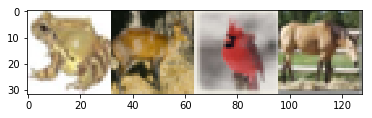

In [7]:
def get_batch(X, y, n):
    rand_items = np.random.randint(0, X.shape[0], size=n)
    images = X[rand_items]
    labels = y[rand_items]
    return X, y

def make_random_grid(x, y, n=4):
    rand_items = np.random.randint(0, x.shape[0], size=n)
    images = x[rand_items]
    labels = y[rand_items]
    grid = np.hstack((np.asarray((vec_2_img(i) + mean_image), dtype=np.int) for i in images))
    print(' '.join('%13s' % classes[labels[j]] for j in range(4)))
    return grid

def vec_2_img(x):
    x = np.reshape(x[:-1], (32, 32, 3))
    return x

X_batch, y_batch = get_batch(X_test, y_test, 4)
plt.imshow(make_random_grid(X_batch, y_batch));

Open the file `functions/classifier.py`. The constructor of the `LogisticRegression` class takes as input the dataset and labels in order to create appropriate parameters. Notice we are using the bias trick and only use the matrix `w` for convenience. Since we already have a (random) model, we can start predicting classes on images. Complete the method `predict` in the `LogisticRegression` class. **5 points**

You can use your code from HW1. If you used vectorized code well, you should make very little changes.

         deer         plane          deer          deer


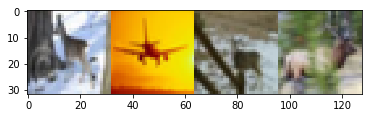

In [8]:
from functions.classifier import LogisticRegression
classifier = LogisticRegression(X_train, y_train)
y_pred = classifier.predict(X_test)
X_batch, y_batch = get_batch(X_train, y_train, 4)
plt.imshow(make_random_grid(X_batch, y_batch));

In [9]:
print(' '.join('%13s' % classes[y_pred[j]] for j in range(4)))

a = np.array([[2,3,5],[1,2,3],[0.1,0.2,0.9]])
b = np.sum(a, axis=0)
print (b)
c = a/b
print (c)
d = np.array([2,0,2])
e = a[d,np.arange(3)]
print (e)
e = -np.log(e)
print (e)
W = np.array([[2,3,4],[1,2,3]])
x = np.linalg.norm(W)
print (x)
print (np.sum(W*W))

          dog          deer         horse          bird
[3.1 5.2 8.9]
[[0.64516129 0.57692308 0.56179775]
 [0.32258065 0.38461538 0.33707865]
 [0.03225806 0.03846154 0.1011236 ]]
[0.1 3.  0.9]
[ 2.30258509 -1.09861229  0.10536052]
6.557438524302
43


In [10]:
print("model accuracy: ", classifier.calc_accuracy(X_train, y_train))

model accuracy:  9.855102040816327


## Cross-entropy

Open the file `functions/losses.py`. Complete the function `softmax_loss_vectorized` using vectorized code. This function takes as input the weights `W`, data `X`, labels `y` and a regularization term `reg` and outputs the calculated loss as a single number and the gradients with respect to W. Don't forget the regularization. **5 points**

In [11]:
from functions.losses import softmax_loss_vectorized
W = np.random.randn(3073, 10) * 0.0001
loss_naive, grad_naive = softmax_loss_vectorized(W, X_val, y_val, 0.00000)
print ('loss: %f' % (loss_naive, ))
print ('sanity check: %f' % (-np.log(0.1))) # should be close but not the same

loss: 2.356335
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? **Explain briefly.**

**Your answer:**
Becuase the data consists of  the same number of images from each class, and we have 10 classes - so the probability for each class given a x(i) is 1/10. According to the Loss equation the loss in that case equals to -log(0.1).

Use the following cell to test your implementation of the gradients.

In [12]:
from functions.losses import grad_check

loss, grad = softmax_loss_vectorized(W, X_val, y_val, 1)
f = lambda w: softmax_loss_vectorized(W, X_val, y_val, 1)[0]
grad_numerical = grad_check(f, W, grad, num_checks=10)

numerical: -0.446666 analytic: -0.446666, relative error: 3.423987e-08
numerical: 2.083609 analytic: 2.083608, relative error: 2.727991e-08
numerical: 2.174468 analytic: 2.174468, relative error: 3.372251e-08
numerical: -1.220916 analytic: -1.220916, relative error: 2.368500e-08
numerical: -0.085072 analytic: -0.085072, relative error: 2.070902e-08
numerical: 3.806786 analytic: 3.806786, relative error: 1.837697e-08
numerical: 1.348766 analytic: 1.348766, relative error: 7.129665e-08
numerical: -1.817117 analytic: -1.817117, relative error: 4.896638e-09
numerical: -0.185752 analytic: -0.185752, relative error: 1.437942e-07
numerical: -2.088534 analytic: -2.088534, relative error: 2.887874e-09


In [13]:
from functions.classifier import LogisticRegression

logistic = LogisticRegression(X_train, y_train)
loss_history = logistic.train(X_train, y_train, 
                         learning_rate=1e-7,
                         reg=5e4, 
                         num_iters=1500,
                         verbose=True)


iteration 0 / 1500: loss 10.018285
iteration 100 / 1500: loss 4.914472
iteration 200 / 1500: loss 3.118615
iteration 300 / 1500: loss 2.484617
iteration 400 / 1500: loss 2.154212
iteration 500 / 1500: loss 2.214989
iteration 600 / 1500: loss 2.075799
iteration 700 / 1500: loss 2.101510
iteration 800 / 1500: loss 2.027943
iteration 900 / 1500: loss 2.073000
iteration 1000 / 1500: loss 2.057837
iteration 1100 / 1500: loss 2.092685
iteration 1200 / 1500: loss 2.079919
iteration 1300 / 1500: loss 2.083607
iteration 1400 / 1500: loss 2.042260


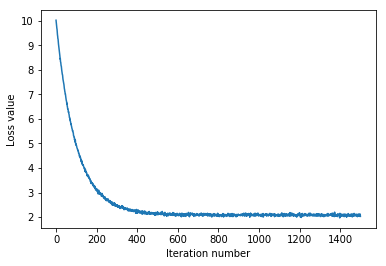

In [14]:
plt.plot(loss_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [15]:
print("Training accuracy: ", logistic.calc_accuracy(X_train, y_train))
print("Testing accuracy: ", logistic.calc_accuracy(X_test, y_test))

Training accuracy:  33.00408163265306
Testing accuracy:  31.900000000000002


Use the validation set to tune hyperparameters by training different models (using the training dataset) and evaluating the performance using the validation dataset. Save the results in a dictionary mapping tuples of the form `(learning_rate, batch_size)` to tuples of the form `(training_accuracy, validation_accuracy)`. Finally, you should evaluate the best model on the testing dataset.

In [158]:
# You are encouraged to experiment with additional values
learning_rates = [1e-8, 2e-7, 1e-7, 5e-6]
regularization_strengths = [6e4, 5e4, 1e5, 5e3, 1e2]
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_logistic = None # The LogisticRegression object that achieved the highest validation score.
################################################################################
#                            START OF YOUR CODE                                #
################################################################################

for lr in learning_rates:
    for reg_strength in regularization_strengths:
        
        logistic = LogisticRegression(X_train, y_train)
        loss_history = logistic.train(X_train, y_train, 
                                 learning_rate=lr,
                                 reg=reg_strength, 
                                 num_iters=1500,
                                 verbose=True)
        
        train_accuracy = logistic.calc_accuracy(X_train, y_train)
        val_accuracy = logistic.calc_accuracy(X_val, y_val)
        results[(lr, reg_strength)] = (train_accuracy, val_accuracy)

        if (val_accuracy > best_val):
            best_val = val_accuracy
            best_logistic = logistic

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

test_accuracy = logistic.calc_accuracy(X_test, y_test)
print ('Binary logistic regression on raw pixels final test set accuracy: %f' % test_accuracy)

iteration 0 / 1500: loss 609.367324
iteration 100 / 1500: loss 605.127955
iteration 200 / 1500: loss 600.912214
iteration 300 / 1500: loss 596.697488
iteration 400 / 1500: loss 592.553464
iteration 500 / 1500: loss 588.443781
iteration 600 / 1500: loss 584.332337
iteration 700 / 1500: loss 580.251377
iteration 800 / 1500: loss 576.239586
iteration 900 / 1500: loss 572.191841
iteration 1000 / 1500: loss 568.233542
iteration 1100 / 1500: loss 564.288548
iteration 1200 / 1500: loss 560.368161
iteration 1300 / 1500: loss 556.444611
iteration 1400 / 1500: loss 552.605297
iteration 0 / 1500: loss 530.432282
iteration 100 / 1500: loss 527.242662
iteration 200 / 1500: loss 524.095549
iteration 300 / 1500: loss 520.927313
iteration 400 / 1500: loss 517.829365
iteration 500 / 1500: loss 514.700301
iteration 600 / 1500: loss 511.655796
iteration 700 / 1500: loss 508.565052
iteration 800 / 1500: loss 505.533055
iteration 900 / 1500: loss 502.532492
iteration 1000 / 1500: loss 499.553868
iteration 

iteration 800 / 1500: loss 48.977983
iteration 900 / 1500: loss 49.096563
iteration 1000 / 1500: loss 49.109688
iteration 1100 / 1500: loss 48.660034
iteration 1200 / 1500: loss 48.629600
iteration 1300 / 1500: loss 49.064683
iteration 1400 / 1500: loss 48.969810
iteration 0 / 1500: loss 876.579672
iteration 100 / 1500: loss 132.972047
iteration 200 / 1500: loss 68.141680
iteration 300 / 1500: loss 65.490212
iteration 400 / 1500: loss 64.391384
iteration 500 / 1500: loss 65.467765
iteration 600 / 1500: loss 65.075593
iteration 700 / 1500: loss 65.212429
iteration 800 / 1500: loss 65.409821
iteration 900 / 1500: loss 65.499708
iteration 1000 / 1500: loss 66.095013
iteration 1100 / 1500: loss 66.443699
iteration 1200 / 1500: loss 65.623336
iteration 1300 / 1500: loss 65.827581
iteration 1400 / 1500: loss 66.409470
iteration 0 / 1500: loss 46.422663
iteration 100 / 1500: loss 42.075327
iteration 200 / 1500: loss 38.577968
iteration 300 / 1500: loss 35.411846
iteration 400 / 1500: loss 32.

iteration 400 / 1500: loss 2.824829
iteration 500 / 1500: loss 2.857527
iteration 600 / 1500: loss 3.073884
iteration 700 / 1500: loss 2.923435
iteration 800 / 1500: loss 3.033109
iteration 900 / 1500: loss 3.088560
iteration 1000 / 1500: loss 3.051105
iteration 1100 / 1500: loss 2.969902
iteration 1200 / 1500: loss 2.904430
iteration 1300 / 1500: loss 2.990513
iteration 1400 / 1500: loss 3.024612
lr 1.000000e-09 reg 1.000000e+02 train accuracy: 17.579592 val accuracy: 18.000000
lr 1.000000e-09 reg 5.000000e+03 train accuracy: 14.718367 val accuracy: 13.400000
lr 1.000000e-09 reg 5.000000e+04 train accuracy: 16.163265 val accuracy: 17.400000
lr 1.000000e-09 reg 6.000000e+04 train accuracy: 16.469388 val accuracy: 15.600000
lr 1.000000e-09 reg 7.000000e+04 train accuracy: 18.734694 val accuracy: 19.400000
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 19.161224 val accuracy: 19.300000
lr 1.000000e-08 reg 1.000000e+02 train accuracy: 29.512245 val accuracy: 30.200000
lr 1.000000e-08 re

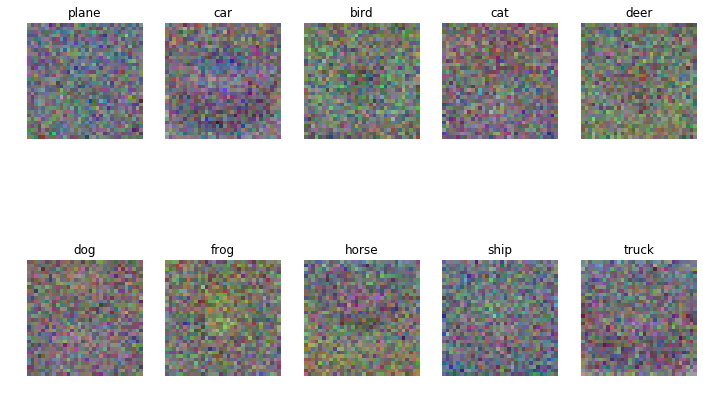

In [157]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
w = best_logistic.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

## Neural Network

The implementation of linear regression was (hopefully) simple yet not very modular since the layer, loss and gradient were calculated as a single monolithic function. This would become impractical as we move towards bigger models. As a warmup towards `PyTorch`, we want to build networks using a more modular design so that we can implement different layer types in isolation and easily integrate them together into models with different architectures.

This logic of isolation & integration is at the heart of all popular deep learning frameworks, and is based on two methods each layer holds - a forward and backward pass. The forward function will receive inputs, weights and other parameters and will return both an output and a cache object storing data needed for the backward pass. The backward pass will receive upstream derivatives and the cache, and will return gradients with respect to the inputs and weights. By implementing several types of layers this way, we will be able to easily combine them to build classifiers with different architectures with relative ease.

We will implement a neural network to obtain better results on CIFAR-10. If you were careful, you should have got a classification accuracy of over 38% on the test set using a simple single layer network. However, using multiple layers we could reach around 50% accuracy. Our neural network will be implemented in the file `functions/neural_net.py`. We will train this network using softmax loss and L2 regularization and a ReLU non-linearity after the first two fully connected layers.

### Fully Connected Layer: Forward Pass.

Open the file `functions/layers.py` and implement the function `fc_forward` **7.5 points**.

In [16]:
np.random.seed(42)
from functions.layers import * 

num_instances = 5
input_shape = (11, 7, 3)
output_shape = 4

X = np.random.randn(num_instances * np.prod(input_shape)).reshape(num_instances, *input_shape)
W = np.random.randn(np.prod(input_shape) * output_shape).reshape(np.prod(input_shape), output_shape)
b = np.random.randn(output_shape)

out, _ = fc_forward(X, W, b)

correct_out = np.array([[16.77132953,  1.43667172, -15.60205534,   7.15789287],
                        [ -8.5994206,  7.59104298,  10.92160126,  17.19394331],
                        [ 4.77874003,  2.25606192,  -6.10944859,  14.76954561],
                        [21.21222953, 17.82329258,   4.53431782,  -9.88327913],
                        [18.83041801, -2.55273817,  14.08484003,  -3.99196171]])

print(np.isclose(out, correct_out, rtol=1e-8).all()) # simple test

True


## Fully Connected Layer: Backward Pass

Open the file `functions/layers.py` and implement the function `fc_backward` **7.5 points**.

In [17]:
np.random.seed(42)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: fc_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: fc_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: fc_forward(x, w, b)[0], b, dout)

out, cache = fc_forward(x,w,b)
dx, dw, db = fc_backward(dout, cache)

np.isclose(dw, dw_num, rtol=1e-8).all() # simple test
np.isclose(dx, dx_num, rtol=1e-8).all() # simple test
np.isclose(db, db_num, rtol=1e-8).all() # simple test

True

## ReLU: Forward Pass

Open the file `functions/layers.py` and implement the function `relu_forward` **7.5 points**.

In [18]:
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)
out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

print(np.isclose(out, correct_out, rtol=1e-8).all()) # simple test

True


## ReLU: Backward Pass

Open the file `functions/layers.py` and implement the function `relu_backward` **7.5 points**.

In [19]:
np.random.seed(42)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)
dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)
xx, cache = relu_forward(x)
dx = relu_backward(dout, cache)

np.isclose(dx, dx_num, rtol=1e-8).all()  # simple test

True

**Optional**: you are given two helper functions in `functions/layers.py` - `fc_relu_forward` and `fc_relu_backward`. You might find it beneficial to use dedicated functions to calculate the forward and backward outputs of a fully connected layer immediately followed by a ReLU.

# Building the Network

First, notice that we are leaving behind the bias trick and removing the bias from each image. 

In [20]:
X_train = np.array([x[:-1] for x in X_train])
X_val = np.array([x[:-1] for x in X_val])
X_test = np.array([x[:-1] for x in X_test])
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 3072)
(1000, 3072)
(1000, 3072)


Open the file `functions/neural_net.py` and complete the class `ThreeLayerNet`. All the implementation details are available in the file itself. Read the documentation carefully since the class of this network is slightly different from the network in the previous section of this exercise. **50 points**

In [35]:
from functions.neural_net import ThreeLayerNet
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = ThreeLayerNet(input_size, hidden_size, num_classes)

In [36]:
model.loss(X_train, y_train)
"""
stats = model.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=1e-3, reg=0, verbose=True)
"""

'\nstats = model.train(X_train, y_train, X_val, y_val,\n            num_iters=1500, batch_size=200,\n            learning_rate=1e-3, reg=0, verbose=True)\n'

In [37]:
val_acc = (model.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)

Validation accuracy:  0.101


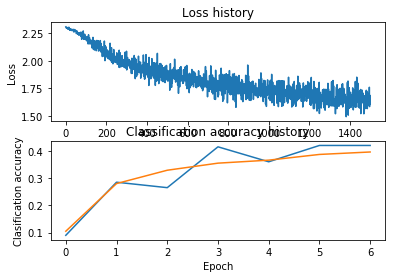

In [38]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

Use the validation set to tune hyperparameters by training different models (using the training dataset) and evaluating the performance using the validation dataset. Save the results in a dictionary mapping tuples of the form `(learning_rate, hidden_size, regularization)` to tuples of the form `(training_accuracy, validation_accuracy)`. You should evaluate the best model on the testing dataset and print out the training, validation and testing accuracies for each of the models and provide a clear visualization. Highlight the best model w.r.t the testing accuracy. **10 points**

In [ ]:
# You are encouraged to experiment with additional values
learning_rates = [1e-7, 5e-6] # this time its up to you
hidden_sizes = [30, 50, 70] # this time its up to you
regularizations = [0.2, 0.4, 0.6] # this time its up to you

results = {}
best_val = -1   
best_net = None 
################################################################################
#                            START OF YOUR CODE                                #
################################################################################

for lr in learning_rates:
    for hs in hidden_sizes:
        for reg in regularizations:
            model = ThreeLayerNet(input_size, hs, num_classes)
            stats = model.train(X_train, y_train, X_val, y_val,
                num_iters=1500, batch_size=200,
                learning_rate=lr, reg=reg, verbose=True)

            training_accuracy = (model.predict(X_train) == y_train).mean()
            validation_accuracy = (model.predict(X_val) == y_val).mean()
            results[(lr, hs, reg)] = (training_accuracy, validation_accuracy)
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_net = model

# Print out results.
for lr, hs, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, hs, reg)]
    print('lr %e hs %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, hs, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved during cross-validation: %f' % best_val)

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

## Inline Question 2:
What can you say about the training? Why does it take much longer to train? How could you speed up computation? What would happen to the network accuracy and training time when adding additional layer? What about additional hidden neurons?

Your answer: The training is much slower since we have added additional layers (the hidden layers), which are heavy to compute (becuase we need to calculate the derivatives for each layer, we have much more features and not only the input layer)- every layer actually adds one more W matrix to train. We can speed up computation by running the trainning on a GPU which is fits to calculations of matrices' multiplication.
When adding additional layer the accuracy will likely to grow (becuase the network is learning more details about the data, it's "smarter", until a certain point on which overfitting begins. The training time will of coures higher, since we add heavy computations.
Additional hidden neurons will also help to certain extent until we have more neurons than input.

## Bonus 
Train a 5 hidden layer network with varying hidden layer size and plot the loss function and train / validation accuracies. **5 points**

In [ ]:
## Your code here ##